In [189]:
import requests   
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
%matplotlib inline
import plotly.express as px        
import plotly.graph_objects as go  
import plotly.io as pio
pio.renderers.default = "notebook"

## 1) Exiba dois box plots lado a lado, um para cada estado, dos índices solicitados:
a - Rendimento nominal médio mensal per capita (3974, censo Demográfico 2010)

In [66]:
url = "https://servicodados.ibge.gov.br/api/v3/agregados/3974/periodos/2010/variaveis/3948?localidades=N6[N3[15,17]]&classificacao=12085[100543]|58[95253]"

response_url = requests.get(url)
data_rend = response_url.json()
for i in data_rend:
  for key in i['resultados']:
    json = key
data_rend = pd.json_normalize(json['series'])
data_rend.rename(columns = {'localidade.id':'id','localidade.nivel.id':'nivel_id','localidade.nome':'local','serie.2010':'rendimento','localidade.nivel.nome':'nivel_nome'},inplace=True)
data_rend

,id,nivel_id,nivel_nome,local,rendimento
0,1500107,N6,Município,Abaetetuba - PA,313.9
1,1500131,N6,Município,Abel Figueiredo - PA,441.3
2,1500206,N6,Município,Acará - PA,237.0
3,1500305,N6,Município,Afuá - PA,228.8
4,1500347,N6,Município,Água Azul do Norte - PA,314.4
...,...,...,...,...,...
277,1721208,N6,Município,Tocantinópolis - TO,439.7
278,1721257,N6,Município,Tupirama - TO,441.7
279,1721307,N6,Município,Tupiratins - TO,372.1
280,1722081,N6,Município,Wanderlândia - TO,403.1


In [67]:
data_rend['MUN'] = [ item.split(' - ')[0] for item in data_rend['local']]
data_rend['UF'] = [ item.split(' - ')[1] for item in data_rend['local']]
data_rend

,id,nivel_id,nivel_nome,local,rendimento,MUN,UF
0,1500107,N6,Município,Abaetetuba - PA,313.9,Abaetetuba,PA
1,1500131,N6,Município,Abel Figueiredo - PA,441.3,Abel Figueiredo,PA
2,1500206,N6,Município,Acará - PA,237.0,Acará,PA
3,1500305,N6,Município,Afuá - PA,228.8,Afuá,PA
4,1500347,N6,Município,Água Azul do Norte - PA,314.4,Água Azul do Norte,PA
...,...,...,...,...,...,...,...
277,1721208,N6,Município,Tocantinópolis - TO,439.7,Tocantinópolis,TO
278,1721257,N6,Município,Tupirama - TO,441.7,Tupirama,TO
279,1721307,N6,Município,Tupiratins - TO,372.1,Tupiratins,TO
280,1722081,N6,Município,Wanderlândia - TO,403.1,Wanderlândia,TO


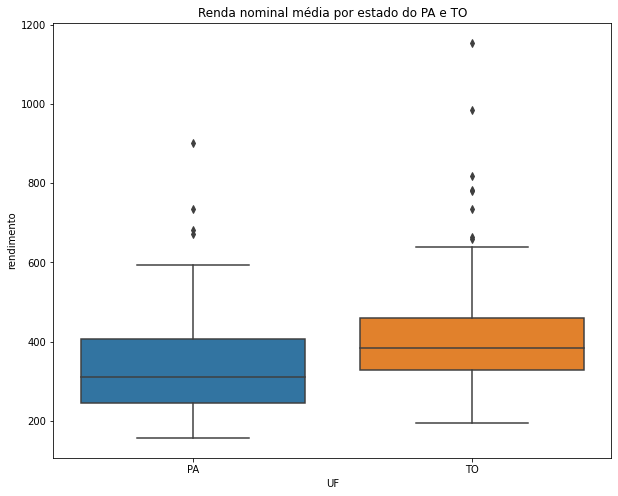

In [72]:
data_rend['rendimento'] = data_rend['rendimento'].astype('float')

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Renda nominal média por estado do PA e TO')
ax.set_xlabel('UF')
ax.set_ylabel('Renda Nominal')

sns.boxplot(data=data_rend, x='UF', y='rendimento', ax=ax)
plt.show()

b - Número de cabeças de bovinos Total (1224 - Censo Agropecuário 2006)

In [114]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/1224/periodos/2006/variaveis/2057?localidades=N6[N3[15,17]]&classificacao=12947[0]'
response_url = requests.get(url)
data_agro = response_url.json()
for i in data_agro:
  for key in i['resultados']:
    json = key
data_agro = pd.json_normalize(json['series'])
data_agro.rename(columns = {'localidade.id':'id','localidade.nivel.id':'nivel_id','UF':'local','serie.2006':'quantidade','localidade.nivel.nome':'nivel_nome'},inplace=True)
data_agro['MUN'] = [ item.split(' - ')[0] for item in data_agro['localidade.nome']]
data_agro['UF'] = [ item.split(' - ')[1] for item in data_agro['localidade.nome']]
data_agro

,id,nivel_id,nivel_nome,localidade.nome,quantidade,MUN,UF
0,1500107,N6,Município,Abaetetuba - PA,4197,Abaetetuba,PA
1,1500131,N6,Município,Abel Figueiredo - PA,39168,Abel Figueiredo,PA
2,1500206,N6,Município,Acará - PA,22072,Acará,PA
3,1500305,N6,Município,Afuá - PA,3325,Afuá,PA
4,1500347,N6,Município,Água Azul do Norte - PA,372992,Água Azul do Norte,PA
...,...,...,...,...,...,...,...
277,1721208,N6,Município,Tocantinópolis - TO,18803,Tocantinópolis,TO
278,1721257,N6,Município,Tupirama - TO,7283,Tupirama,TO
279,1721307,N6,Município,Tupiratins - TO,11702,Tupiratins,TO
280,1722081,N6,Município,Wanderlândia - TO,35706,Wanderlândia,TO


In [115]:
#tem uma coluna com um X impedindo os dados de ser do tipo float 
display(data_agro[data_agro['quantidade']=='X'])
data_agro.loc[data_agro['quantidade']=='X', 'quantidade'] = np.nan
data_agro['quantidade'] = data_agro['quantidade'].astype('float')
data_agro.quantidade.isna().sum()
data_agro.dropna(subset=['quantidade'],inplace=True)
display(data_agro[data_agro['quantidade']=='X'])

,id,nivel_id,nivel_nome,localidade.nome,quantidade,MUN,UF
9,1500800,N6,Município,Ananindeua - PA,X,Ananindeua,PA


,id,nivel_id,nivel_nome,localidade.nome,quantidade,MUN,UF


In [116]:
data_agro['quantidade'].dtype

dtype('float64')

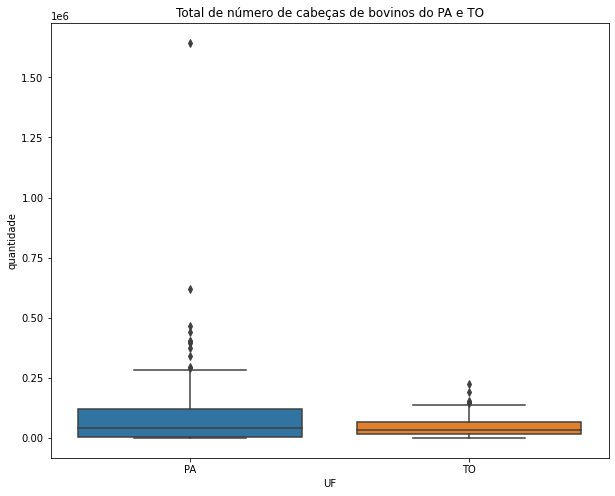

In [118]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Total de número de cabeças de bovinos do PA e TO')
ax.set_xlabel('UF')
ax.set_ylabel('Quantidade de cabeçãs bovinas')

sns.boxplot(data=data_agro, x='UF', y='quantidade', ax=ax)
plt.show()

## 2) Exiba um gráfico de linha, onde cada linha corresponda a um estado, com a informação de:
a - Índices da Construção Civil: Custo médio (2296) por número índice (49) a partir de 1º de Janeiro de 2000

In [200]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/2296/periodos/200001|200101|200201|200301|200401|200501|200601|200701|200801|200901|201001|201101|201201|201301|201401|201501|201601|201701|201801|201901|202001/variaveis/49?localidades=N3[15,17]'

response_url = requests.get(url)
data_civil = response_url.json()
for item in data_civil:
  for key in item['resultados']:
    json = key
data_civil = pd.json_normalize(json['series'])
data_civil


,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.200001,serie.200101,serie.200201,serie.200301,serie.200401,serie.200501,...,serie.201101,serie.201201,serie.201301,serie.201401,serie.201501,serie.201601,serie.201701,serie.201801,serie.201901,serie.202001
0,15,N3,Unidade da Federação,Pará,143.62,154.89,167.45,187.43,209.53,229.31,...,362.67,384.12,408.45,407.66,431.13,470.00,498.35,502.13,534.39,557.78
1,17,N3,Unidade da Federação,Tocantins,163.18,171.74,189.04,218.31,250.66,272.05,...,419.06,425.13,462.07,477.69,500.93,542.97,571.49,589.33,610.85,625.86


In [201]:
rename_columns = {
    'serie.200001':'2000',
    'serie.200101':'2001',
    'serie.200201':'2002',
    'serie.200301':'2003', 
    'serie.200401':'2004', 
    'serie.200501':'2005', 
    'serie.200601':'2006',
    'serie.200701':'2007', 
    'serie.200801':'2008', 
    'serie.200901':'2009', 
    'serie.201001':'2010',
    'serie.201101':'2011', 
    'serie.201201':'2012', 
    'serie.201301':'2013', 
    'serie.201401':'2014',
    'serie.201501':'2015', 
    'serie.201601':'2016', 
    'serie.201701':'2017', 
    'serie.201801':'2018',
    'serie.201901':'2019', 
    'serie.202001':'2020'
}
data_civil.rename(columns=rename_columns,inplace=True)
data_civil = data_civil.T[4:].reset_index()
data_civil.rename(columns={0:'Para',1:'Tocantins','index':'Ano'},inplace=True)
data_civil

,Ano,Para,Tocantins
0,2000,143.62,163.18
1,2001,154.89,171.74
2,2002,167.45,189.04
3,2003,187.43,218.31
4,2004,209.53,250.66
5,2005,229.31,272.05
6,2006,244.36,291.55
7,2007,260.50,305.25
8,2008,279.87,327.06
9,2009,314.69,368.92


In [207]:
data_civil['Para'] = data_civil['Para'].astype('float')
data_civil['Tocantins'] = data_civil['Tocantins'].astype('float')
data_civil = data_civil.melt(id_vars=['Ano'],var_name='Estado',value_name='custo')

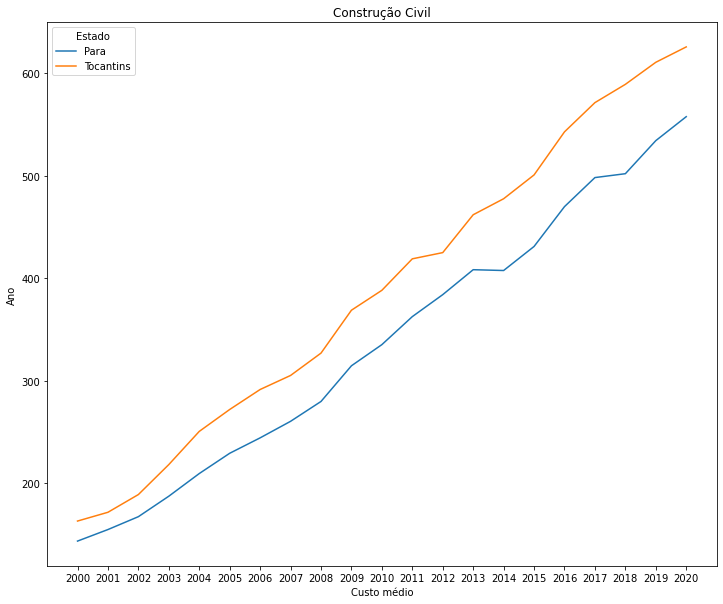

In [222]:
fig, ax = plt.subplots(figsize=(12,10))

ax.set_title('Construção Civil')
ax.set_xlabel('Custo médio')
ax.set_ylabel('Ano')
sns.lineplot(data=data_civil,x = 'Ano', y='custo',hue='Estado')
plt.show()

b - Produto Interno Bruto: Índice Gini do PIB, referência 2010 (5939, 529) para cada estado, a partir de 2002

In [256]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/5939/periodos/2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019/variaveis/529?localidades=N3[15,17]'

response_url = requests.get(url)
data_gini = response_url.json()
for item in data_gini:
  for key in item['resultados']:
    json = key
data_gini = pd.json_normalize(json['series'])
data_gini

,localidade.id,localidade.nivel.id,localidade.nivel.nome,localidade.nome,serie.2002,serie.2003,serie.2004,serie.2005,serie.2006,serie.2007,...,serie.2010,serie.2011,serie.2012,serie.2013,serie.2014,serie.2015,serie.2016,serie.2017,serie.2018,serie.2019
0,15,N3,Unidade da Federação,Pará,0.728359,0.725016,0.735970,0.731493,0.737730,0.735058,...,0.754573,0.762108,0.756890,0.737801,0.727915,0.716042,0.701392,0.713949,0.716724,0.732588
1,17,N3,Unidade da Federação,Tocantins,0.709031,0.689553,0.692404,0.694704,0.704422,0.702163,...,0.712411,0.706482,0.709824,0.707042,0.710743,0.715613,0.716685,0.715442,0.714197,0.715054


In [257]:
rename_columns = {
    'serie.2002':'2002',
    'serie.2003':'2003', 
    'serie.2004':'2004', 
    'serie.2005':'2005', 
    'serie.2006':'2006',
    'serie.2007':'2007', 
    'serie.2008':'2008', 
    'serie.2009':'2009', 
    'serie.2010':'2010',
    'serie.2011':'2011', 
    'serie.2012':'2012', 
    'serie.2013':'2013', 
    'serie.2014':'2014',
    'serie.2015':'2015', 
    'serie.2016':'2016', 
    'serie.2017':'2017', 
    'serie.2018':'2018',
    'serie.2019':'2019'
}
data_gini.rename(columns=rename_columns,inplace=True)
data_gini = data_gini.T[4:].reset_index()
data_gini.rename(columns={0:'Para',1:'Tocantins','index':'Ano'},inplace=True)
data_gini

,Ano,Para,Tocantins
0,2002,0.728359,0.709031
1,2003,0.725016,0.689553
2,2004,0.735970,0.692404
3,2005,0.731493,0.694704
4,2006,0.737730,0.704422
5,2007,0.735058,0.702163
6,2008,0.750837,0.695974
7,2009,0.732581,0.689725
8,2010,0.754573,0.712411
9,2011,0.762108,0.706482


In [258]:
data_gini['Para'] = data_gini['Para'].astype('float')
data_gini['Tocantins'] = data_gini['Tocantins'].astype('float')
data_gini = data_gini.melt(id_vars=['Ano'],var_name='Estado',value_name='gini')

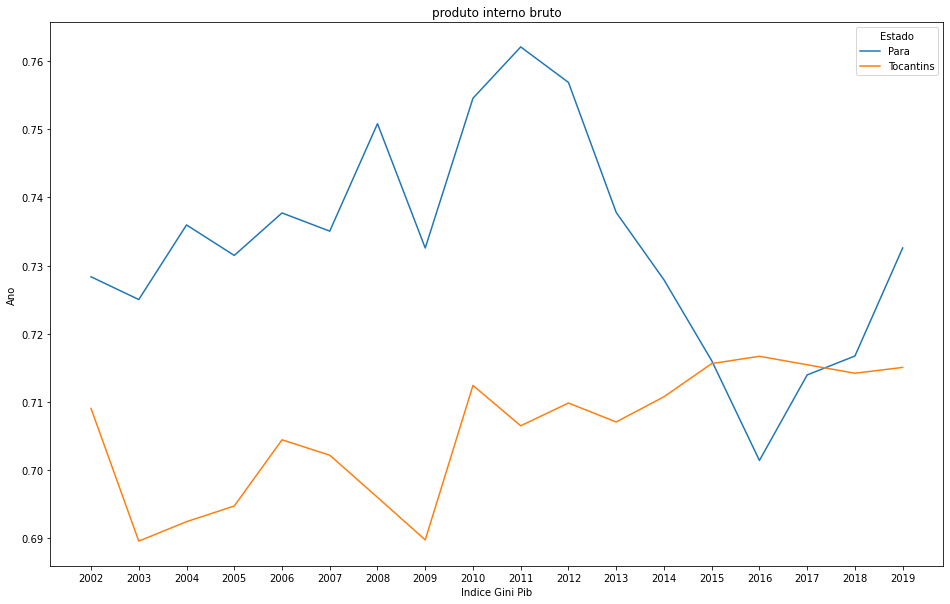

In [259]:
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Produto interno bruto')
ax.set_xlabel('Indice Gini Pib')
ax.set_ylabel('Ano')
sns.lineplot(data=data_gini,x = 'Ano', y='gini',hue='Estado')
plt.show()